# ECommerce Transactions Datasets (EDA)

In [16]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
customers = pd.read_csv("datasets/customers.csv")
products = pd.read_csv("datasets/products.csv")
transactions = pd.read_csv("datasets/transactions.csv")

In [18]:
# Step 3: Basic Data Inspection
print("Customers' Data:\n")
print(customers.head())
print(customers.info())

Customers' Data:

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [19]:
print("Products' Data:\n")
print(products.head())
print(products.info())

Products' Data:

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [20]:
print("Transactions' Data:\n")
print(transactions.head())
print(transactions.info())

Transactions' Data:

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 

In [21]:
# Step 4: Merge Data
# Merge transactions with customers and products
merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")
merged_data = merged_data.drop(columns=["Price_y"])
merged_data = merged_data.rename(columns={"Price_x": "Price"})

print("Merged Data:\n")
merged_data

Merged Data:



,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics


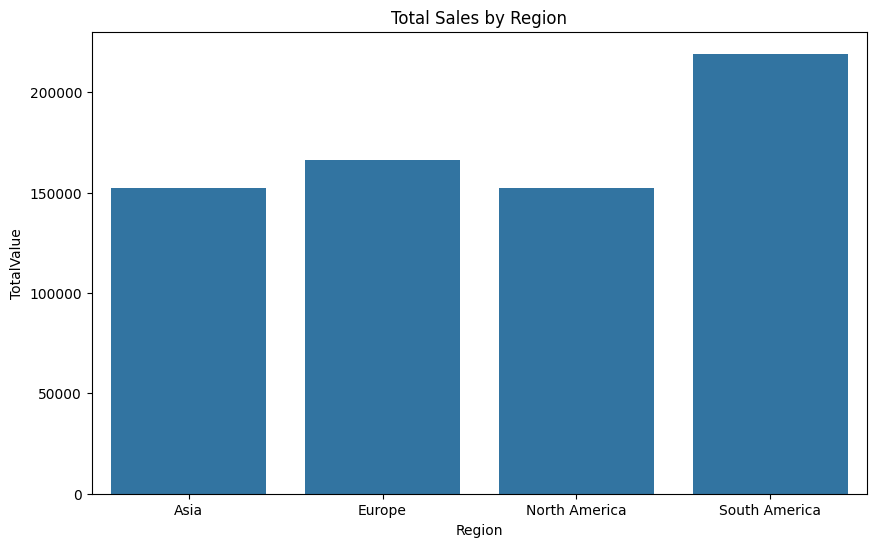

In [22]:
# Step 5: EDA and Visualizations
# 1. Total Sales by Region
region_sales = merged_data.groupby("Region")["TotalValue"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="TotalValue", data=region_sales)
plt.title("Total Sales by Region")
plt.show()

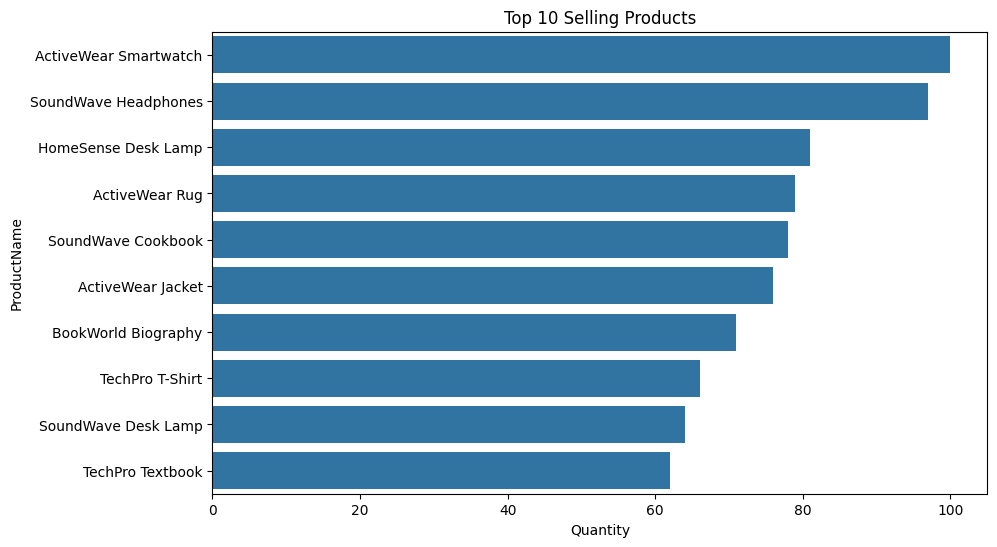

In [23]:
# 2. Top Selling Products
top_products = merged_data.groupby("ProductName")["Quantity"].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Quantity", y="ProductName", data=top_products)
plt.title("Top 10 Selling Products")
plt.show()

/tmp/ipykernel_2588/2970265319.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


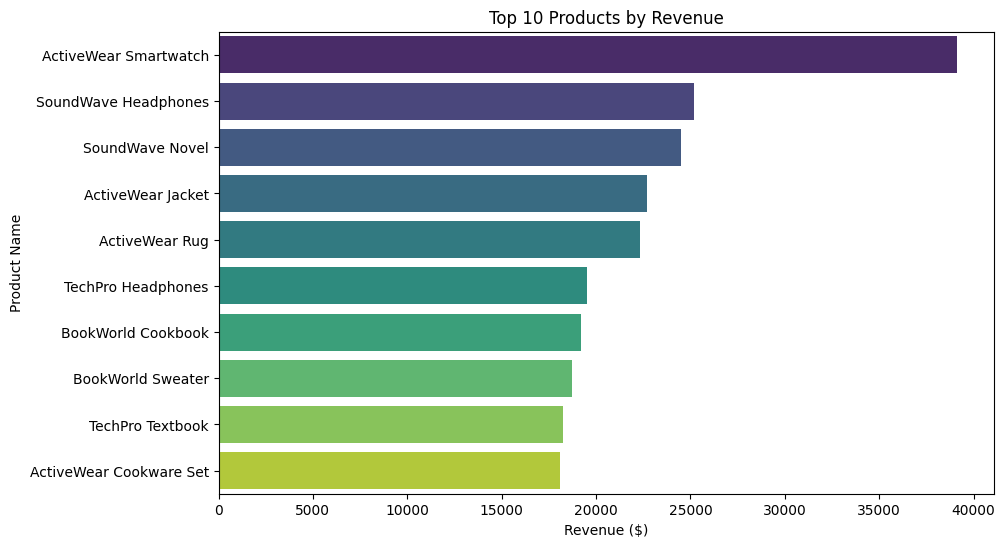

In [24]:
# 3. Top 10 Products by Revenue
# Calculate revenue per product
top_by_revenue = (
	merged_data
	.assign(Revenue=merged_data["Quantity"] * merged_data["Price"])
	.groupby("ProductName")["Revenue"]
	.sum()
	.nlargest(10)
	.reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
	data=top_by_revenue,
	x="Revenue",
	y="ProductName",
	palette="viridis"
)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Product Name")
plt.show()

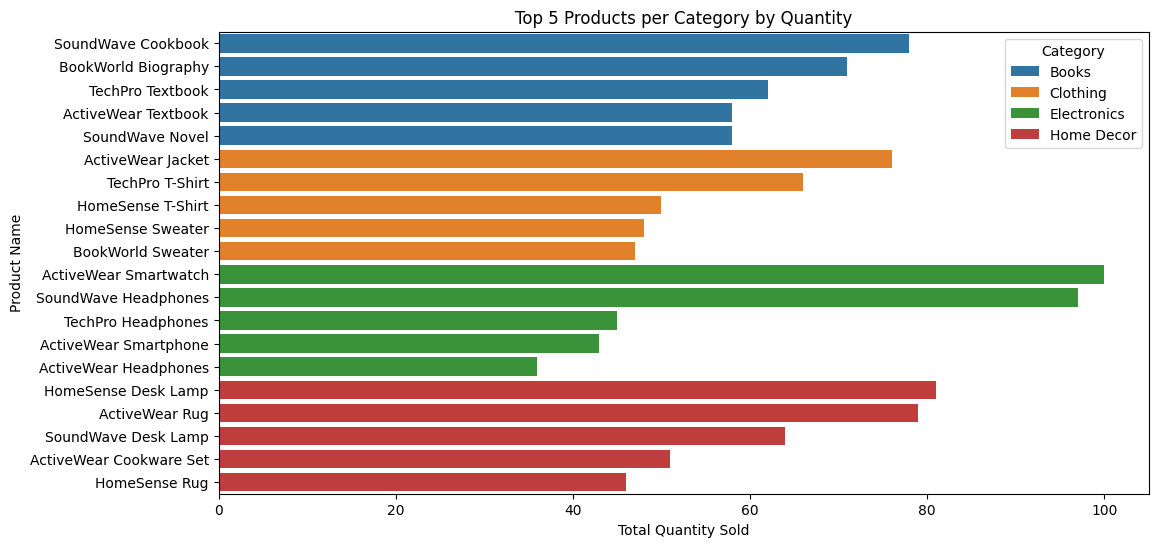

In [25]:
# 4.Top 5 products per category
top_per_category = (
	merged_data
	.groupby(["Category", "ProductName"])["Quantity"]
	.sum()
	.reset_index()
	.sort_values(["Category", "Quantity"], ascending=[True, False])
	.groupby("Category")
	.head(5)
)

plt.figure(figsize=(12, 6))
sns.barplot(
	data=top_per_category,
	x="Quantity",
	y="ProductName",
	hue="Category"
)
plt.title("Top 5 Products per Category by Quantity")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.legend(title="Category")
plt.show()

/tmp/ipykernel_2588/3811633892.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


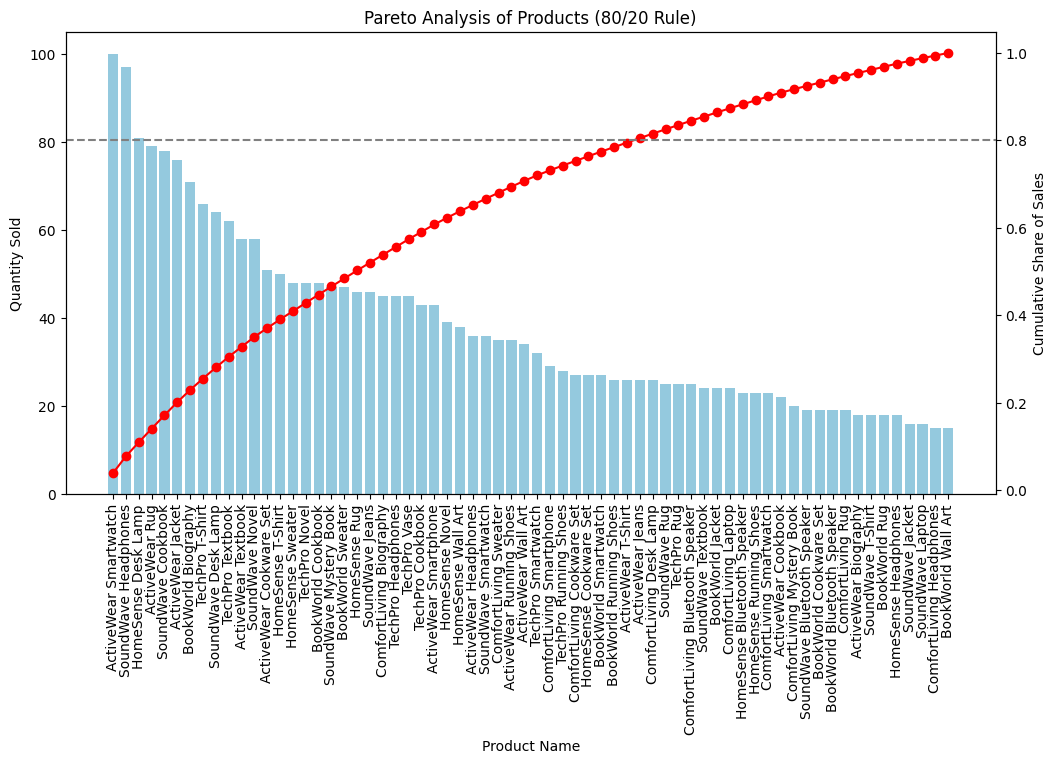

In [26]:
# 5. Pareto Analysis of Products (80/20 Chart)
# Pareto: cumulative share of quantity
product_sales = (
	merged_data
	.groupby("ProductName")["Quantity"]
	.sum()
	.sort_values(ascending=False)
	.reset_index()
)
product_sales["cumulative_share"] = (
	product_sales["Quantity"].cumsum() / product_sales["Quantity"].sum()
)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for quantities
sns.barplot(
	data=product_sales,
	x="ProductName",
	y="Quantity",
	ax=ax1,
	color="skyblue"
)
ax1.set_ylabel("Quantity Sold")
ax1.set_xlabel("Product Name")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Line plot for cumulative share
ax2 = ax1.twinx()
ax2.plot(
	product_sales["ProductName"],
	product_sales["cumulative_share"],
	color="red",
	marker="o"
)
ax2.set_ylabel("Cumulative Share of Sales")
ax2.axhline(0.8, color="gray", linestyle="--")  # 80% threshold

plt.title("Pareto Analysis of Products (80/20 Rule)")
plt.show()

/tmp/ipykernel_2588/1643852665.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(key="TransactionDate", freq="M"), "ProductName"])["Quantity"]


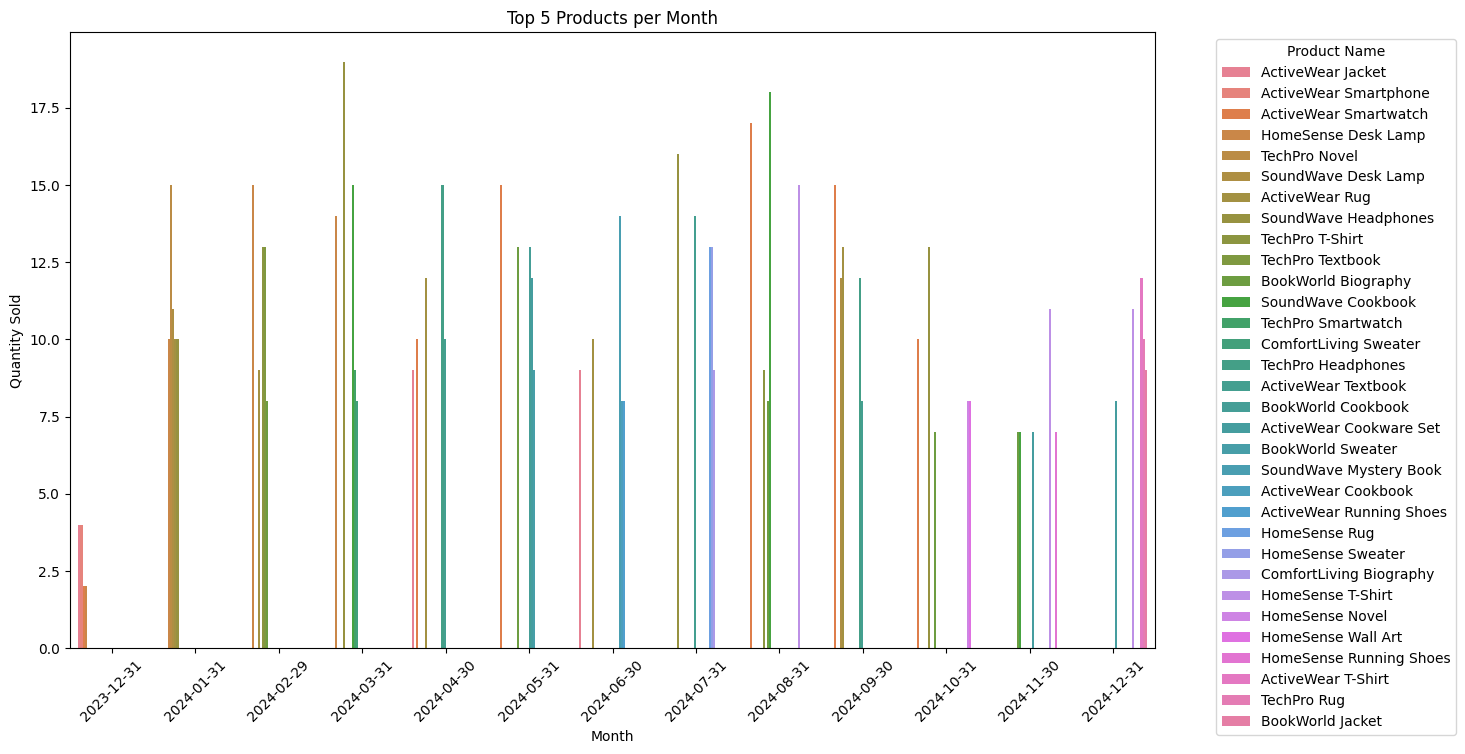

In [27]:
# 6. Top 5 Products Per Month
# Convert date
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])

# Top 5 products per month
monthly_top = (
	merged_data
	.groupby([pd.Grouper(key="TransactionDate", freq="M"), "ProductName"])["Quantity"]
	.sum()
	.reset_index()
	.sort_values(["TransactionDate", "Quantity"], ascending=[True, False])
	.groupby("TransactionDate")
	.head(5)
)

plt.figure(figsize=(14, 8))
sns.barplot(
	data=monthly_top,
	x="TransactionDate",
	y="Quantity",
	hue="ProductName"
)
plt.title("Top 5 Products per Month")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1))
plt.show()


/tmp/ipykernel_2588/4163196788.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_data.resample('M', on="TransactionDate")["TotalValue"].sum()


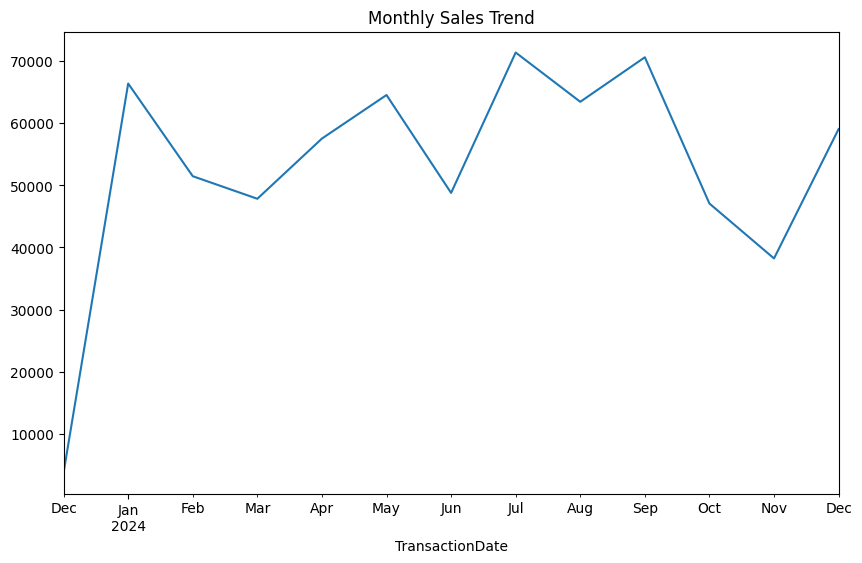

In [28]:
# 7. Transaction Trends Over Time
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
monthly_sales = merged_data.resample('M', on="TransactionDate")["TotalValue"].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()

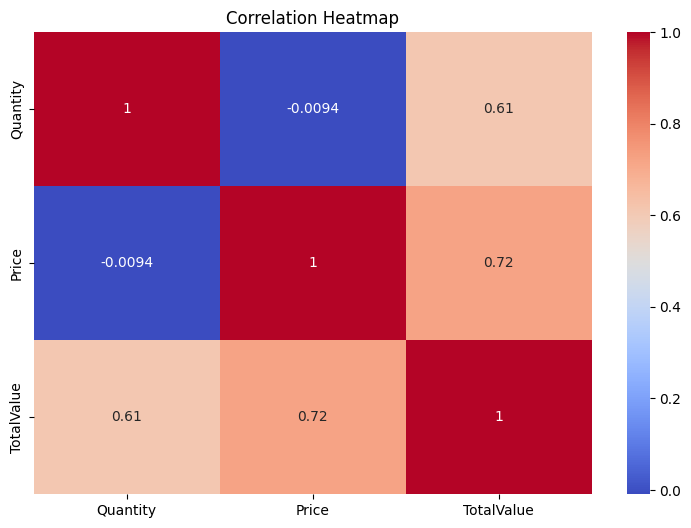

In [29]:
# 8. Correlation Heatmap
corr_matrix = merged_data[["Quantity", "Price", "TotalValue"]].corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Sales Data Visualizations
This section generates a series of plots to summarize sales performance and trends.  
- **Figure 1** (Plots 1–4):  
  1. Total Sales by Region  
  2. Top 10 Selling Products by Quantity  
  3. Top 10 Products by Revenue  
  4. Top 5 Products per Category by Quantity  

- **Figure 2** (Plots 5–8):  
  5. Pareto Analysis of Products (80/20 Rule)  
  6. Top 5 Products per Month  
  7. Monthly Sales Trend  
  8. Correlation Heatmap of numerical features  

Each figure is saved as a high-resolution PNG in the `visualizations` folder.


In [31]:
# ---------- 1. Create figure for plots 1-4 ----------
fig1, axes1 = plt.subplots(2, 2, figsize=(16, 12))

# 1. Total Sales by Region
sns.barplot(x="Region", y="TotalValue", data=region_sales, ax=axes1[0, 0])
axes1[0, 0].set_title("Total Sales by Region")

# 2. Top Selling Products
sns.barplot(x="Quantity", y="ProductName", data=top_products, ax=axes1[0, 1])
axes1[0, 1].set_title("Top 10 Selling Products")

# 3. Top 10 Products by Revenue
sns.barplot(data=top_by_revenue, x="Revenue", y="ProductName", palette="viridis", ax=axes1[1, 0])
axes1[1, 0].set_title("Top 10 Products by Revenue")
axes1[1, 0].set_xlabel("Revenue ($)")
axes1[1, 0].set_ylabel("Product Name")

# 4. Top 5 Products per Category
sns.barplot(data=top_per_category, x="Quantity", y="ProductName", hue="Category", ax=axes1[1, 1])
axes1[1, 1].set_title("Top 5 Products per Category by Quantity")
axes1[1, 1].legend(title="Category")

fig1.tight_layout()

# Save first PNG
png1_path = os.path.join("visualizations", "sales_analysis_1.png")
plt.savefig(png1_path, dpi=300)
print(f"Saved: {os.path.abspath(png1_path)}")
plt.close(fig1)


# ---------- 2. Create figure for plots 5-8 ----------
fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))

# 5. Pareto Analysis of Products
ax1 = axes2[0, 0]
sns.barplot(data=product_sales, x="ProductName", y="Quantity", ax=ax1, color="skyblue")
ax1.set_ylabel("Quantity Sold")
ax1.set_xlabel("Product Name")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2 = ax1.twinx()
ax2.plot(product_sales["ProductName"], product_sales["cumulative_share"], color="red", marker="o")
ax2.set_ylabel("Cumulative Share of Sales")
ax2.axhline(0.8, color="gray", linestyle="--")
ax1.set_title("Pareto Analysis of Products (80/20 Rule)")

# 6. Top 5 Products per Month
sns.barplot(data=monthly_top, x="TransactionDate", y="Quantity", hue="ProductName", ax=axes2[0, 1])
axes2[0, 1].set_title("Top 5 Products per Month")
axes2[0, 1].set_xlabel("Month")
axes2[0, 1].set_ylabel("Quantity Sold")
axes2[0, 1].tick_params(axis="x", rotation=45)
axes2[0, 1].legend(title="Product Name", bbox_to_anchor=(1.05, 1))

# 7. Transaction Trends Over Time
monthly_sales.plot(ax=axes2[1, 0])
axes2[1, 0].set_title("Monthly Sales Trend")
axes2[1, 0].set_xlabel("Date")
axes2[1, 0].set_ylabel("Total Sales ($)")

# 8. Correlation Heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes2[1, 1])
axes2[1, 1].set_title("Correlation Heatmap")

fig2.tight_layout()

# Save second PNG
png2_path = os.path.join("visualizations", "sales_analysis_2.png")
plt.savefig(png2_path, dpi=300)
print(f"Saved: {os.path.abspath(png2_path)}")
plt.close(fig2)

/tmp/ipykernel_2588/4216358590.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_by_revenue, x="Revenue", y="ProductName", palette="viridis", ax=axes1[1, 0])


Saved: /workspaces/Customers/visualizations/sales_analysis_1.png


/tmp/ipykernel_2588/4216358590.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


Saved: /workspaces/Customers/visualizations/sales_analysis_2.png
